### MTH00051 -- TUTORIAL 04
## MARKOV CHAIN

Ví dụ:

Các hoạt động của An trong mùa dịch: chạy bộ, ăn kem, ngủ.

Dựa vào thống kê lịch sử hoạt động, người ta thấy rằng: nếu hôm nay An ngủ, hôm sau có 60% khả năng cô ấy chạy bộ, 20% ngủ tiếp, 20% ăn kem.

Nếu hôm nay chạy bộ, 60% hôm sau sẽ chạy tiếp, 30% ăn kem, 10% ngủ.

Nếu hôm nay ăn kem, 10% khả năng mai sẽ ăn tiếp, 70% chạy bộ, 20% ngủ.

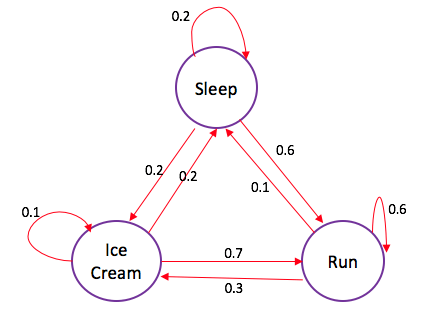

Câu hỏi: nếu hôm nay ngủ, xác suất để An chạy bộ sau khi bị cách li 1 ngày là bao nhiêu? (ngày thứ 2 sẽ chạy bộ, nếu tính hôm nay là ngày thứ 0)

In [1]:
(0.2 * 0.6) + (0.6 * 0.6) + (0.2 * 0.7) # sleep in day0 -> [(sleep -> run) or (run -> run) or (ice cream -> run)]

0.62

In [1]:
import numpy as np
import random as rm
import pandas as pd
# The statespace
states = ["Sleep","Run","Icecream"]

# Probabilities matrix (transition matrix)
transitionMatrix = {"Sleep": [0.2,0.6,0.2], "Run": [0.1,0.6,0.3], "Icecream": [0.2,0.7,0.1]}

df_transitionMatrix = pd.DataFrame(transitionMatrix, index = states)
print(df_transitionMatrix)
# Choose the starting state
today = input("Start state [Sleep, Icecream, Run]: ")

# A function that implements the Markov model to forecast the state/mood.
def activity_forecast(days, today):
    # Shall store the sequence of states taken
    activityList = [today]
    prob = 1
    for i in range(days):
        change = np.random.choice(states, replace = True, p = df_transitionMatrix[today])
        prob *= df_transitionMatrix.loc[change, today]
        activityList.append(change)
        today = change
    return activityList, prob
        
print(activity_forecast(2, today))

N = 10000
# Iterate through the activityList to get a count of all activities ending in state:'Run'
list_activity = []
for i in range(1,N):
    list_activity.append(activity_forecast(2, today)[0])
prob = sum([1 for act in list_activity if act[-1] == "Run"])/N
print (prob)

          Sleep  Run  Icecream
Sleep       0.2  0.1       0.2
Run         0.6  0.6       0.7
Icecream    0.2  0.3       0.1
Start state [Sleep, Icecream, Run]: Sleep
(['Sleep', 'Run', 'Run'], 0.36)
0.6178


In [43]:
# With transition matrix in t0, we can build the Markov Chain by multiplying this transition matrix 
# by itself to obtain the probability matrix in t1
t0 = df_transitionMatrix
t1 = t0.dot(t0)
t2 = t0.dot(t1)
print(t2)
print(pd.DataFrame(np.linalg.matrix_power(t0, 2)))

#equilibrium matrix => iterate the process up to the probabilities don’t change more
t0 = df_transitionMatrix
ti = t0
ti1 = t0.dot(ti)
while not ti.equals(ti1):
    ti = ti1
    ti1 = t0.dot(ti)
print(ti)

          Sleep    Run  Icecream
Sleep     0.138  0.137     0.139
Run       0.624  0.623     0.626
Icecream  0.238  0.240     0.235
      0     1     2
0  0.14  0.14  0.13
1  0.62  0.63  0.61
2  0.24  0.23  0.26
             Sleep       Run  Icecream
Sleep     0.137615  0.137615  0.137615
Run       0.623853  0.623853  0.623853
Icecream  0.238532  0.238532  0.238532
